## Importing necessary libraries

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


## Reading Data

In [8]:
agency = pd.read_csv('agency.txt')
routes = pd.read_csv('routes.txt')
calendar = pd.read_csv('calendar.txt')
shapes = pd.read_csv('shapes.txt')
stop_times = pd.read_csv('stop_times.txt')
stops = pd.read_csv('stops.txt')
trips = pd.read_csv('trips.txt')

In [3]:
agency


,agency_id,agency_name,agency_url,agency_timezone,agency_lang,agency_phone,agency_fare_url,agency_email
0,DMRC,Delhi Metro Rail Corporation,http://www.delhimetrorail.com/,Asia/Kolkata,NaN,NaN,NaN,NaN


In [49]:
routes.head(5)

,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_url,route_color,route_text_color,route_sort_order,continuous_pickup,continuous_drop_off
0,33,NaN,R_SP_R,RAPID_Phase 3 (Rapid Metro) to Sector 55-56 (R...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
1,31,NaN,G_DD_R,GRAY_Dhansa Bus Stand to Dwarka,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
2,29,NaN,P_MS_R,PINK_Shiv Vihar to Majlis Park,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
3,12,NaN,M_JB,MAGENTA_Janak Puri West to Botanical Garden,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
4,11,NaN,P_MS,PINK_Majlis Park to Shiv Vihar,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
calendar

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,weekday,1,1,1,1,1,0,0,20190101,20251231
1,saturday,0,0,0,0,0,1,0,20190101,20251231
2,sunday,0,0,0,0,0,0,1,20190101,20251231


In [51]:
shapes.head(10)

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled
0,shp_1_2,28.615887,77.022461,1,0.000
1,shp_1_2,28.616341,77.022499,2,50.510
2,shp_1_2,28.617985,77.022453,3,233.586
3,shp_1_2,28.618252,77.022453,4,263.487
4,shp_1_2,28.618425,77.022438,5,282.857
5,shp_1_2,28.618710,77.022369,6,315.208
6,shp_1_2,28.618958,77.022285,7,343.930
7,shp_1_2,28.619217,77.022163,8,375.033
8,shp_1_2,28.619474,77.022018,9,407.190
9,shp_1_2,28.619741,77.021797,10,443.984


In [52]:
stop_times.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,timepoint,continuous_pickup,continuous_drop_off
0,0,05:28:08,05:28:28,21,0,NaN,0,0,0.000,1,NaN,NaN
1,0,05:30:58,05:31:18,20,1,NaN,0,0,1202.405,1,NaN,NaN
2,0,05:33:28,05:33:48,19,2,NaN,0,0,2480.750,1,NaN,NaN
3,0,05:35:33,05:35:53,18,3,NaN,0,0,3314.936,1,NaN,NaN
4,0,05:37:53,05:38:13,17,4,NaN,0,0,4300.216,1,NaN,NaN


In [53]:
stops

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon
0,1,NaN,Dilshad Garden,NaN,28.675991,77.321495
1,2,NaN,Jhilmil,NaN,28.675648,77.312393
2,3,NaN,Mansrover park,NaN,28.675352,77.301178
3,4,NaN,Shahdara,NaN,28.673531,77.287270
4,5,NaN,Welcome,NaN,28.671986,77.277931
...,...,...,...,...,...,...
257,516,NaN,Pari Chowk,NaN,28.463331,77.508308
258,517,NaN,Alpha 1,NaN,28.470879,77.512718
259,518,NaN,Delta 1,NaN,28.478374,77.525581
260,519,NaN,GNIDA Office,NaN,28.484531,77.536621


In [54]:
trips.head()

,route_id,service_id,trip_id,trip_headsign,trip_short_name,direction_id,block_id,shape_id,wheelchair_accessible,bikes_allowed
0,0,weekday,0,NaN,NaN,NaN,NaN,shp_1_30,0,0
1,0,weekday,1,NaN,NaN,NaN,NaN,shp_1_30,0,0
2,0,weekday,10,NaN,NaN,NaN,NaN,shp_1_30,0,0
3,0,weekday,100,NaN,NaN,NaN,NaN,shp_1_30,0,0
4,2,weekday,1000,NaN,NaN,NaN,NaN,shp_1_13,0,0


# Analysis along with Feature engineering

## Geographical routes on a map

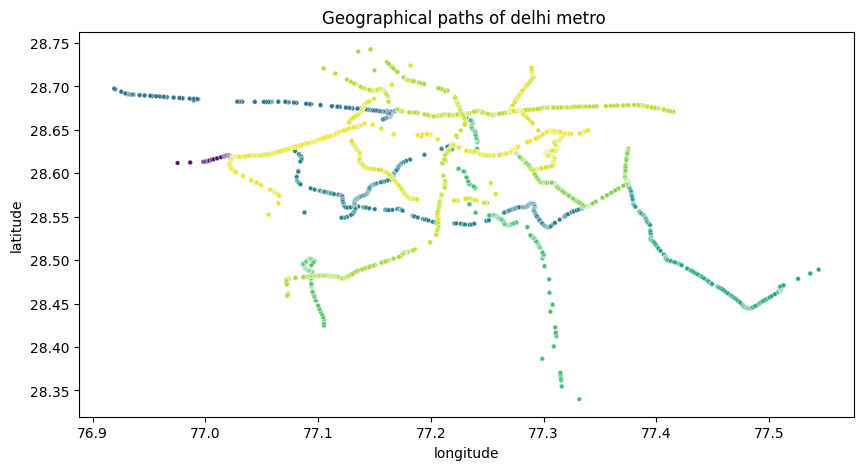

In [10]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='shape_pt_lon', y='shape_pt_lat', data=shapes, palette = 'viridis', s=10, hue='shape_id', legend=None)
plt.title('Geographical paths of delhi metro ')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()


1. **Comprehensive Coverage**:
   - The Delhi Metro system extensively covers the city, ensuring wide accessibility.

2. **High Network Density**:
   - Central and northern areas have a dense network of metro lines, indicating frequent stops and high accessibility.

3. **Hub-and-Spoke Model**:
   - The metro lines radiate from central hubs to peripheral areas, showing a strategic hub-and-spoke model.

4. **Multiple Routes**:
   - Different colors represent various metro lines, highlighting the diversity and extensive connectivity of the network.

## Trips per day of week
Now we analysed the number of travels in a week ie. from Monday to Sunday 
by analyzing calendar and trip data

Text(0, 0.5, 'number of trips')

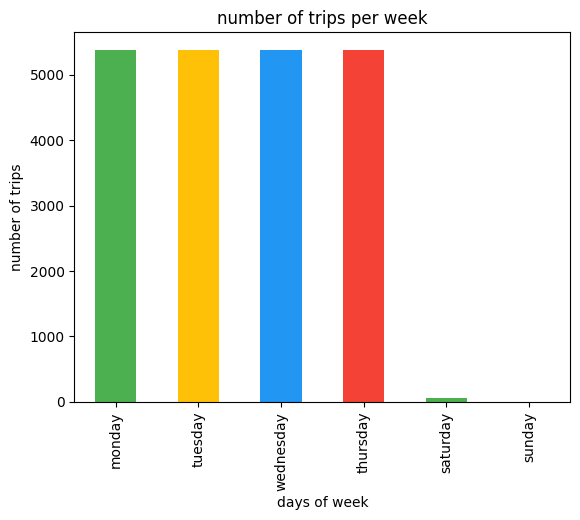

In [11]:
trips_calendar = pd.merge(trips, calendar, on='service_id', how='left')

trip_count = trips_calendar[['monday', 'tuesday','wednesday','thursday', 'saturday', 'sunday']].sum()

custom_palette = ["#4CAF50", "#FFC107", "#2196F3", "#F44336"]
trip_count.plot(kind='bar', color=custom_palette)
plt.title('number of trips per week')
plt.xlabel('days of week')
plt.ylabel('number of trips')


1. **Consistent Weekday Trips**:
   - The number of trips from Monday to Thursday is consistently high, with each day having around 5000 trips. This suggests a stable demand for metro services on weekdays.

2. **Low Weekend Trips**:
   - There is a significant drop in the number of trips on Saturday, and no trips are recorded for Sunday. This indicates much lower transit usage on weekends, reflecting a common pattern where weekday commuting is dominant.

3. **Peak Midweek Demand**:
   - While Monday through Thursday show high numbers of trips, there is no significant peak on any particular weekday, indicating a balanced distribution of trips across these days.

### Trends and Patterns:

- **Weekday Dominance**: The data shows a clear pattern of high transit usage on weekdays, likely driven by work and school commutes.
- **Weekend Decline**: The sharp decline in trips during the weekend suggests that fewer people use the metro for non-work-related travel or weekend activities.
- **Regular Usage**: The consistent number of trips from Monday to Thursday indicates regular and reliable usage patterns, with no single day standing out as significantly busier or quieter.

This visualization effectively highlights the difference in transit usage between weekdays and weekends, emphasizing the importance of weekday services for commuters.

## Distripution of metro stations in Delhi
We analyze the connectivity and effectiveness of the route strategy, I will analyze the distribution and connectivity of stops

Text(0, 0.5, 'longitude')

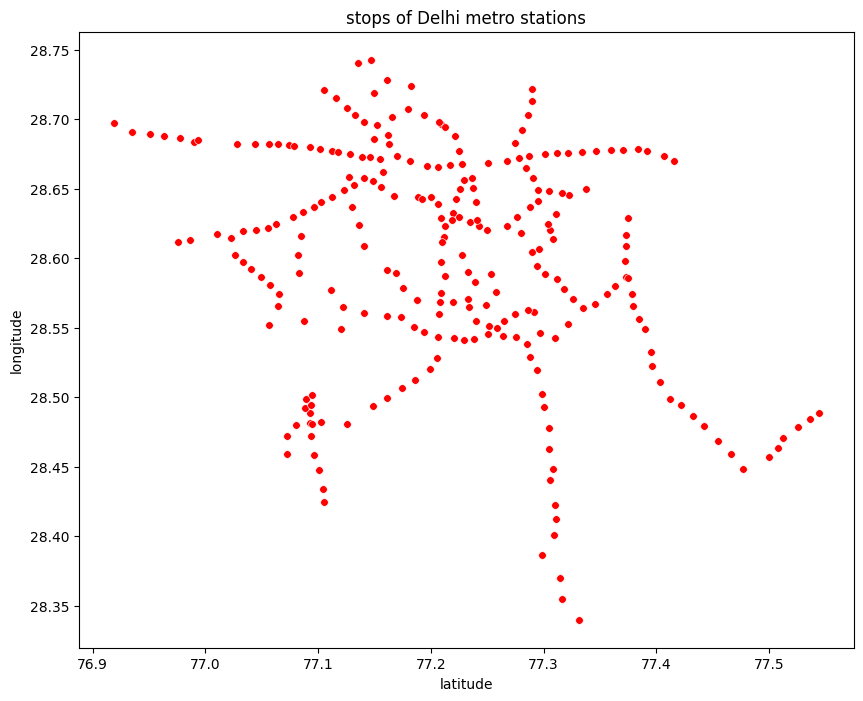

In [12]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='stop_lon', y='stop_lat', data=stops, color='red', s=30, legend=None)
plt.title('stops of Delhi metro stations')
plt.xlabel('latitude')
plt.ylabel('longitude')



The scatter plot indicates that stops are fairly evenly distributed across the covered areas of Delhi. 
This ensures that passengers have relatively easy access to transit services 
regardless of their location within the service area.

## Route Complexity 
In the below plot we analyzed the number of routes from various metro stations in Delhi

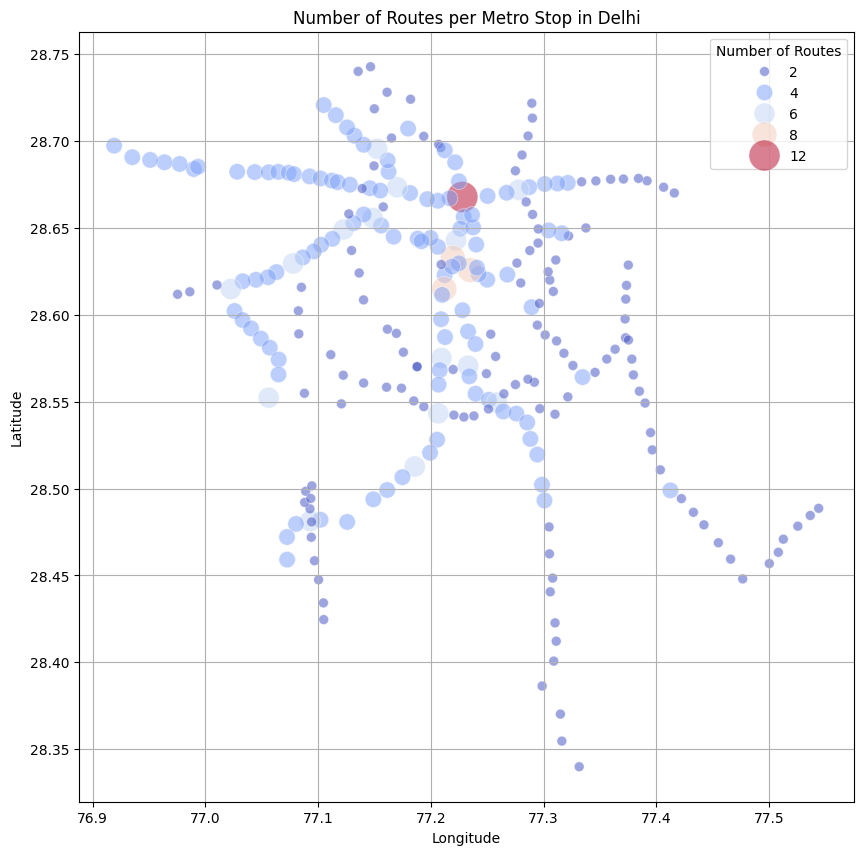

In [13]:
stops_time_trips = pd.merge(stop_times, trips, on='trip_id')
stops_with_routes = pd.merge(stops_time_trips, routes, on='route_id')

stops_route_counts = stops_with_routes.groupby('stop_id')['route_id'].nunique().reset_index()
stops_route_counts = stops_route_counts.rename(columns={'route_id': 'number_of_routes'})

stops_route_counts = pd.merge(stops_route_counts, stops, on='stop_id')

plt.figure(figsize=(10, 10))
sns.scatterplot(x='stop_lon', y='stop_lat', size='number_of_routes', hue='number_of_routes',
                sizes=(50, 500), alpha=0.5, palette='coolwarm', data=stops_route_counts)
plt.title('Number of Routes per Metro Stop in Delhi')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Number of Routes')
plt.grid(True)
plt.show()

The scatter plot above represents the number of routes that pass through each Delhi Metro stop. Stops are visualized in different colours and sizes based on the number of routes they connect, providing insights into the complexity of the network at various locations. Key observations are:

#### Hubs and Transfer Points: 
Larger circles (in warmer colours) indicate stops where multiple routes intersect. These stops serve as major transfer points within the network, facilitating easier cross-city travel for passengers.
#### Distribution: 
Stops with fewer routes, shown in cooler colours and smaller sizes, tend to be more peripheral or on less busy lines. The central areas and more populated zones have stops with greater connectivity.

## Service frequency
We analyze the frequency of service by examining the timing intervals between trips during different parts of the day. It will help us understand peak and off-peak operational strategies, which are crucial for managing commuter flow efficiently. Let’s calculate and visualize these intervals: 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_624\773209120.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stop_time_interval.loc[:, 'part_of_day'] = stop_time_interval['arrival_time_dt'].apply(part_of_day)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_624\773209120.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_time_interval, x='part_of_day', y='interval_minuites', palette='viridis', legend=False)


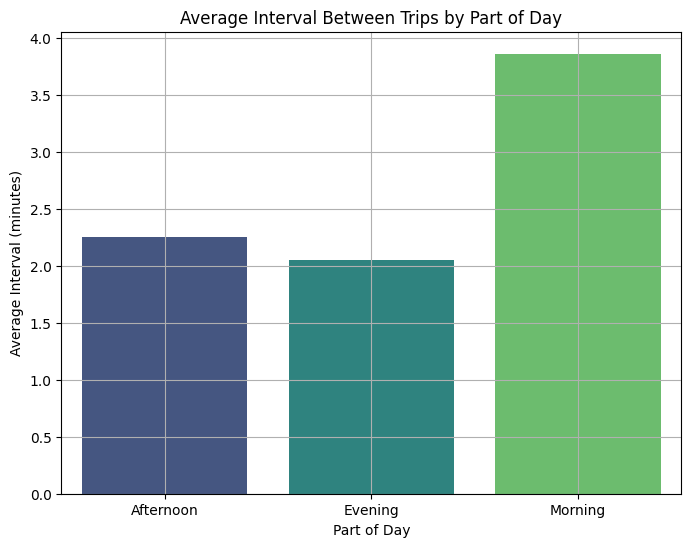

In [14]:

import datetime as dt
def convert_to_datetime(time_str):
    try:
        return dt.datetime.strptime(time_str, '%H:%M:%S').time()
    except ValueError:
        hour, minuite, second = map(int, time_str.split(':'))
        return dt.time(hour % 24, minuite, second)

stop_times['arrival_time_dt'] = stop_times['arrival_time'].apply(convert_to_datetime)

#sort by stop_id and arrival_time
stop_times_sorted = stop_times.sort_values(by=['stop_id', 'arrival_time_dt'])

#createing column from next arrival time
stop_times_sorted['next_arrival_times'] = stop_times_sorted.groupby('stop_id')['arrival_time_dt'].shift(-1)

def time_diffrence(time1, time2):
    if pd.isna(time1) or pd.isna(time2):
        return None
    date_time_1 = dt.datetime.combine(dt.date.today(), time1)
    date_time_2 = dt.datetime.combine(dt.date.today(), time2)
    return (date_time_2 - date_time_1).seconds / 60

stop_times_sorted['interval_minuites'] = stop_times_sorted.apply(lambda row: time_diffrence(row['arrival_time_dt'], row['next_arrival_times']), axis=1)

stop_time_interval = stop_times_sorted.dropna(subset=['interval_minuites'])

def part_of_day(time):
    if time < dt.time(12, 0):
        return 'Morning'
    elif time < dt.time(17, 0):
        return 'Afternoon'
    else:
        return 'Evening'

#stop_time_interval['part_of_day'] = stop_time_interval['arrival_time_dt'].apply(part_of_day)
# Correct way to assign new values using .loc
stop_time_interval.loc[:, 'part_of_day'] = stop_time_interval['arrival_time_dt'].apply(part_of_day)

average_time_interval = stop_time_interval.groupby('part_of_day')['interval_minuites'].mean().reset_index()
average_time_interval

plt.figure(figsize=(8,6))
#sns.barplot(data=average_time_interval, x='part_of_day', y='interval_minuites', palette='viridis')
# Correct way to use sns.barplot with palette
sns.barplot(data=average_time_interval, x='part_of_day', y='interval_minuites', palette='viridis', legend=False)

plt.title('Average Interval Between Trips by Part of Day')
plt.xlabel('Part of Day')
plt.ylabel('Average Interval (minutes)')
plt.grid(True)
plt.show()



### Key Insights:
1. **Morning has the Longest Interval**:
   - The average interval between trips in the morning is significantly higher than in the other parts of the day, reaching close to 3.5 to 4.0 minutes. This indicates that trips are less frequent in the morning.

2. **Evening has the Shortest Interval**:
   - The evening period shows the shortest average interval between trips, slightly below 2.0 minutes. This suggests that trips are more frequent during the evening.

3. **Afternoon Falls in Between**:
   - The afternoon period has an average interval between trips that is slightly above 2.0 minutes, which is longer than the evening but shorter than the morning. 

### Patterns:
- **Decreasing Frequency from Evening to Morning**:
  - There is a clear pattern where the frequency of trips decreases from evening to afternoon and then further to morning. This can be visualized by the increasing average intervals from evening to morning.

### Trends:
- **Morning Sluggishness**:
  - The longer intervals in the morning might be attributed to fewer people making trips early in the day, possibly due to later start times or lower demand during morning hours.

- **Evening Activity Spike**:
  - The shorter intervals in the evening indicate a spike in activity, likely due to people commuting back home, running errands, or engaging in social activities after work hours.

### Implications:
- **Operational Planning**:
  - For transportation or service-based businesses, increasing resources or optimizing operations during evening hours might be necessary to handle the higher frequency of trips.
  - Conversely, fewer resources may be needed in the morning due to the longere morning being the least busy.

## Number of trips during a day
Now, let’s calculate the number of trips and the available capacity per time interval. It will give us a basic understanding of how service levels vary throughout the day. We’ll classify the intervals as:

Early Morning: Before 6 AM
Morning Peak: 6 AM to 10 AM
Midday: 10 AM to 4 PM
Evening Peak: 4 PM to 8 PM
Late Evening: After 8 PM

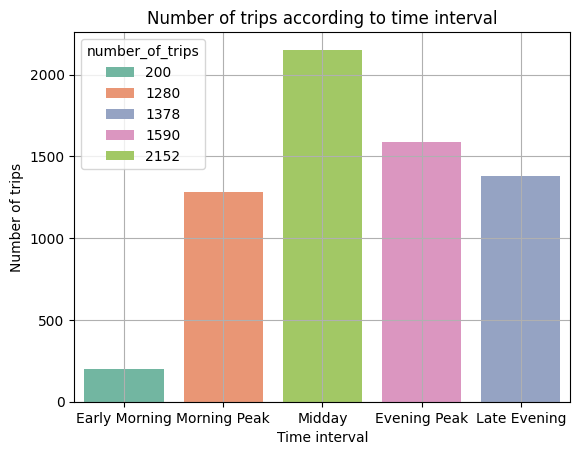

In [15]:
def time_interval_classification(time):
    if time < dt.time(6, 0):
        return 'Early Morning'
    elif time < dt.time(10, 0):
        return 'Morning Peak'
    elif time < dt.time(16, 0):
        return 'Midday'
    elif time < dt.time(20, 0):
        return 'Evening Peak'
    else:
        return 'Late Evening'
stop_times['time_interval'] = stop_times['arrival_time_dt'].apply(time_interval_classification)

trips_per_interval = stop_times.groupby('time_interval')['trip_id'].nunique().reset_index()
trips_per_interval = trips_per_interval.rename(columns={'trip_id':'number_of_trips'})

# Sorting the data frame
ordered_interval = ['Early Morning', 'Morning Peak', 'Midday', 'Evening Peak', 'Late Evening']
trips_per_interval['time_interval'] = pd.Categorical(trips_per_interval['time_interval'], categories=ordered_interval, ordered=True)

trips_per_interval = trips_per_interval.sort_values('time_interval')
trips_per_interval

sns.barplot(data=trips_per_interval, x='time_interval', y='number_of_trips', palette='Set2', hue='number_of_trips')
plt.title('Number of trips according to time interval')
plt.xlabel('Time interval')
plt.ylabel('Number of trips')
plt.grid(True)
plt.show()

The highest number of trips occur during the Morning Peak and Evening Peak times, 
indicating these are the busiest periods for transit usage.
The bar plot shows a clear pattern of increased trip frequency during the Morning Peak (6 AM to 10 AM) 
and Evening Peak (4 PM to 8 PM) intervals. 
This aligns with typical commuter behavior, where most people travel to and from work or school.


### Key Insights:
1. **Midday Dominates**:
   - The Midday time interval sees the highest number of trips, reaching over 2,100 trips. This suggests that midday is the busiest time for trips.

2. **Morning Peak and Evening Peak**:
   - Both Morning Peak and Evening Peak have a substantial number of trips, with around 1,280 and 1,590 trips respectively. These times are likely the rush hours when people are commuting to and from work or school.

3. **Lower Activity in Early Morning and Late Evening**:
   - The Early Morning and Late Evening intervals have the fewest trips, with Early Morning having the least at around 200 trips. This indicates lower demand during these times, likely due to the times being outside of typical working hours.

### Patterns:
- **Peak Times**:
  - There are clear peaks in the number of trips during the Morning Peak and Evening Peak times. This is typical of commuting patterns, where there is a surge in activity during the start and end of the workday.

- **Off-Peak Times**:
  - Early Morning and Late Evening are the off-peak times with significantly fewer trips. This aligns with general expectations of lower transportation demand outside regular hours.

### Trends:
- **Midday Spike**:
  - The highest number of trips during midday could indicate a variety of activities such as lunch breaks, mid-day errands, or other daytime engagements. This trend highlights the significance of the midday period for trip planning and resource allocation.

- **Even Distribution Among Peak Times**:
  - The Morning Peak and Evening Peak have a somewhat balanced distribution, showing that both are critical periods for managing trip volumes. This might reflect consistent travel needs both in ctively throughout the day.

## Optimizing operations to avoid over crowding in metro


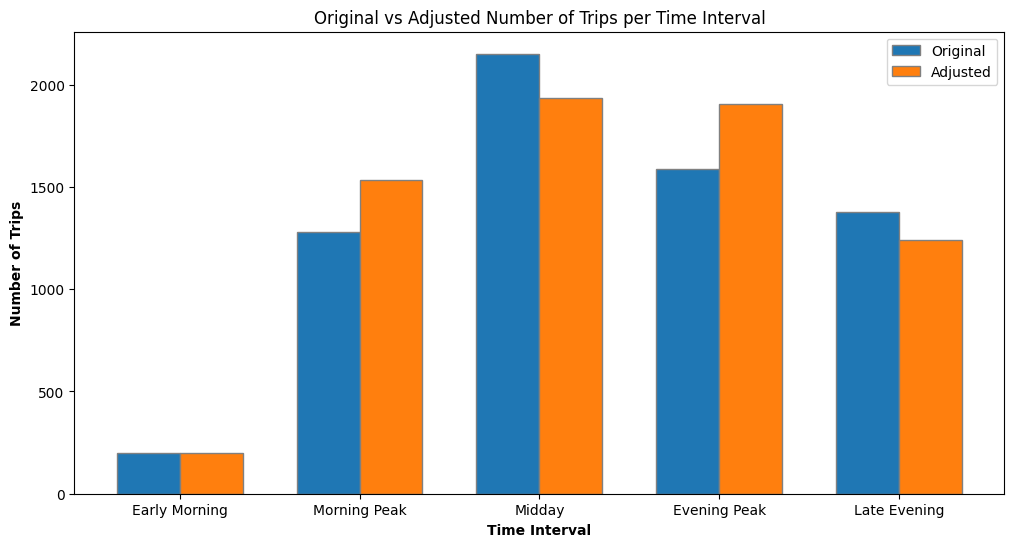

In [30]:
# adjusting frequencies based on hypothetical scenario
adjusted_trips_per_interval = trips_per_interval.copy()
adjustment_factors = {'Morning Peak': 1.20, 'Evening Peak': 1.20, 'Midday': 0.90, 'Early Morning': 1.0, 'Late Evening': 0.90}

# apply the adjustments
adjusted_trips_per_interval['adjusted_number_of_trips'] = adjusted_trips_per_interval.apply(
    lambda row: int(row['number_of_trips'] * adjustment_factors[row['time_interval']]), axis=1)

# plotting original vs adjusted number of trips per time interval
plt.figure(figsize=(12, 6))
bar_width = 0.35
r1 = range(len(adjusted_trips_per_interval))
r2 = [x + bar_width for x in r1]

plt.bar(r1, adjusted_trips_per_interval['number_of_trips'], width=bar_width, edgecolor='grey', label='Original')
plt.bar(r2, adjusted_trips_per_interval['adjusted_number_of_trips'], width=bar_width, edgecolor='grey', label='Adjusted')

plt.xlabel('Time Interval', fontweight='bold')
plt.ylabel('Number of Trips', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(adjusted_trips_per_interval))], adjusted_trips_per_interval['time_interval'])
plt.title('Original vs Adjusted Number of Trips per Time Interval')
plt.legend()

plt.show()